In [35]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import splitfolders

In [36]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [37]:
# input_folder ='dataset'
# output = "final-dataset"

# splitfolders.ratio(input_folder, output=output, seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)

In [38]:
train_path="final-dataset/train"
test_path="final-dataset/test"
val_path="final-dataset/val"

In [39]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [40]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [41]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [42]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [43]:
train_x.shape,test_x.shape,val_x.shape

((1778, 224, 224, 3), (784, 224, 224, 3), (279, 224, 224, 3))

In [44]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1778 images belonging to 5 classes.
Found 784 images belonging to 5 classes.
Found 279 images belonging to 5 classes.


In [47]:
training_set.class_indices

{'keyboard': 0, 'laptop': 1, 'mobile': 2, 'mouse': 3, 'television': 4}

In [48]:
train_y=training_set.classes

In [49]:
test_y=test_set.classes

In [50]:
val_y=val_set.classes

In [51]:
train_y.shape,test_y.shape,val_y.shape

((1778,), (784,), (279,))

In [52]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [53]:
for layer in vgg.layers:
    layer.trainable = False

In [54]:
x = Flatten()(vgg.output)

prediction = Dense(5, activation='softmax')(x)

In [55]:
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [56]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [59]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=50,shuffle=True)

Epoch 1/10
36/36 [==============================] - 931s 26s/step - loss: 0.8245 - accuracy: 0.7717 - val_loss: 0.2642 - val_accuracy: 0.9032
Epoch 2/10
36/36 [==============================] - 958s 27s/step - loss: 0.1765 - accuracy: 0.9381 - val_loss: 0.2079 - val_accuracy: 0.9176
Epoch 3/10
36/36 [==============================] - 950s 27s/step - loss: 0.0932 - accuracy: 0.9803 - val_loss: 0.1784 - val_accuracy: 0.9319
Epoch 4/10
36/36 [==============================] - 876s 24s/step - loss: 0.0650 - accuracy: 0.9876 - val_loss: 0.1602 - val_accuracy: 0.9498
Epoch 5/10
36/36 [==============================] - 1053s 29s/step - loss: 0.0541 - accuracy: 0.9904 - val_loss: 0.1464 - val_accuracy: 0.9570
Epoch 6/10
36/36 [==============================] - 1028s 28s/step - loss: 0.0376 - accuracy: 0.9949 - val_loss: 0.1444 - val_accuracy: 0.9498
Epoch 7/10
36/36 [==============================] - 1758s 50s/step - loss: 0.0273 - accuracy: 0.9989 - val_loss: 0.1585 - val_accuracy: 0.9319
Epo

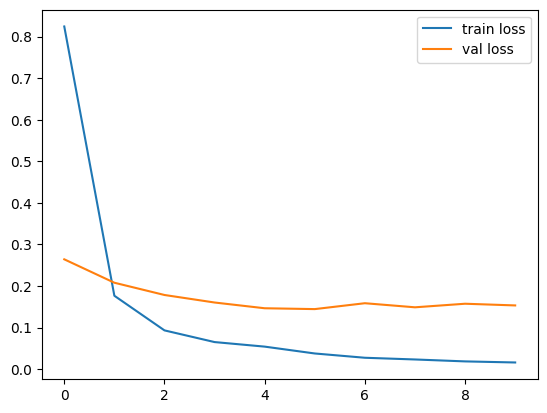

In [60]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

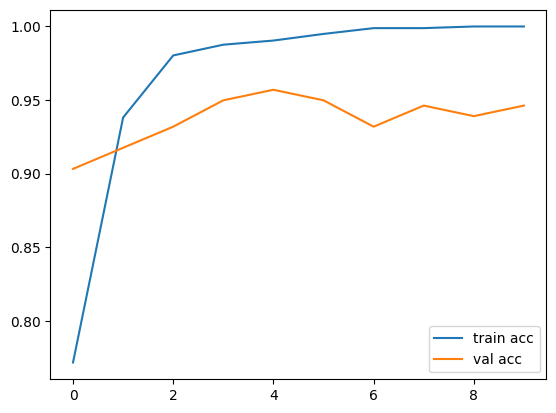

In [61]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [62]:
model.evaluate(test_x,test_y,batch_size=32)

25/25 [==============================] - 332s 13s/step - loss: 0.1521 - accuracy: 0.9490


[0.15214155614376068, 0.9489796161651611]

In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [64]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

25/25 [==============================] - 345s 14s/step


In [65]:
accuracy_score(y_pred,test_y)

0.9489795918367347

In [67]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       176
           1       0.84      0.91      0.87        46
           2       0.81      0.87      0.84        15
           3       1.00      1.00      1.00         7
           4       0.99      0.94      0.97       540

    accuracy                           0.95       784
   macro avg       0.90      0.94      0.92       784
weighted avg       0.95      0.95      0.95       784



In [68]:
confusion_matrix(y_pred,test_y)

array([[172,   2,   0,   0,   2],
       [  2,  42,   1,   0,   1],
       [  1,   1,  13,   0,   0],
       [  0,   0,   0,   7,   0],
       [ 23,   5,   2,   0, 510]], dtype=int64)

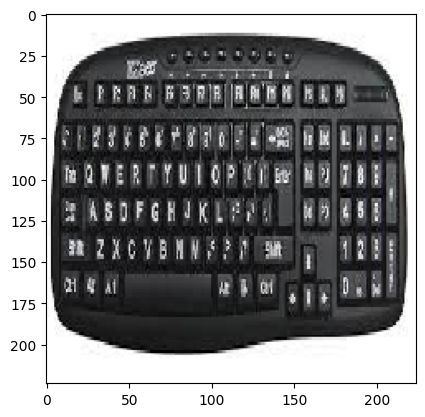

1/1 [==============================] - 1s 523ms/step
Keyboard


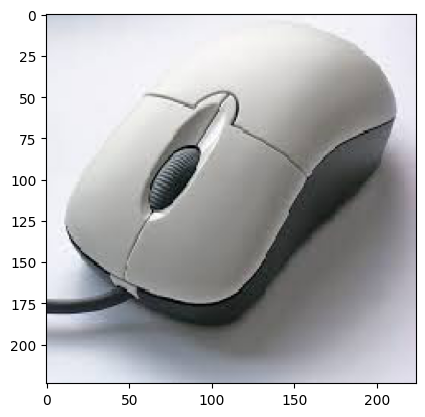

1/1 [==============================] - 1s 523ms/step
Mouse


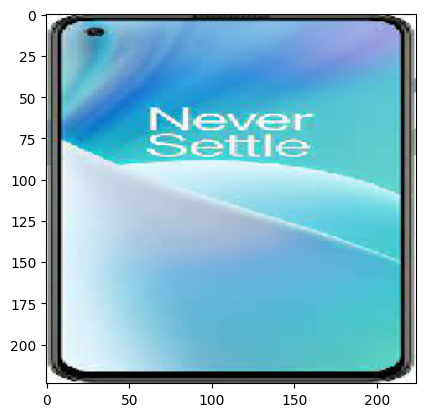

1/1 [==============================] - 1s 594ms/step
Mobile


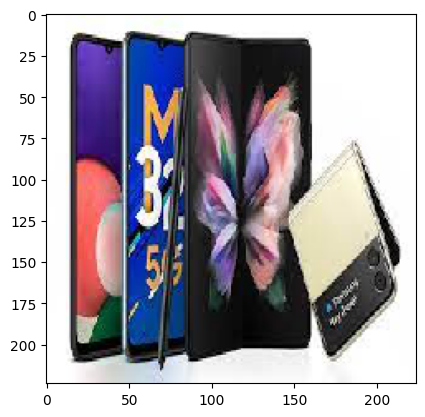

1/1 [==============================] - 1s 578ms/step
Keyboard


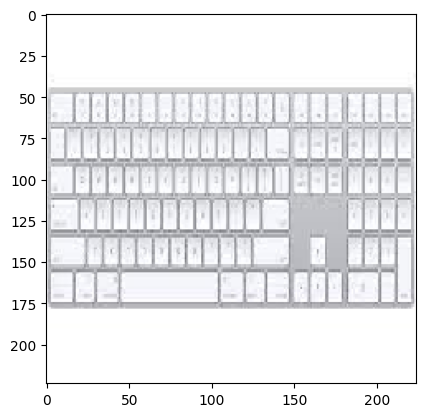

1/1 [==============================] - 1s 593ms/step
Keyboard


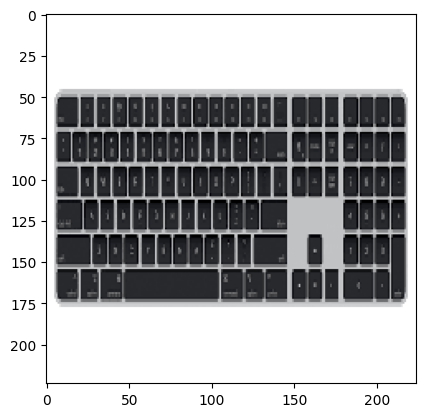

1/1 [==============================] - 1s 567ms/step
Keyboard


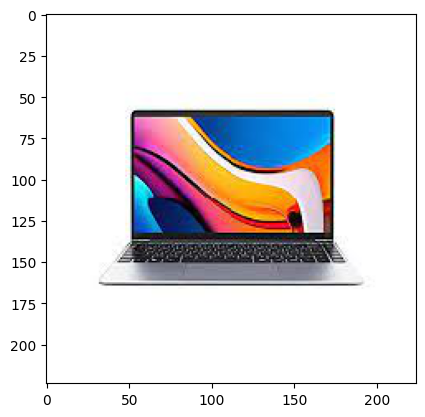

1/1 [==============================] - 1s 555ms/step
Laptop


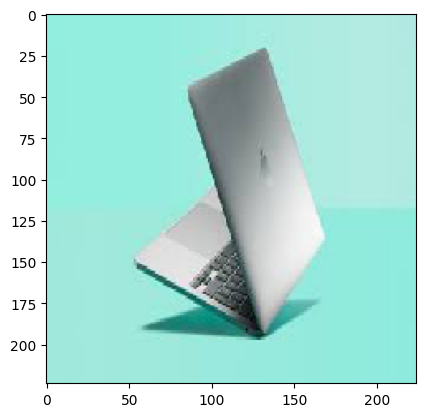

1/1 [==============================] - 1s 631ms/step
Laptop


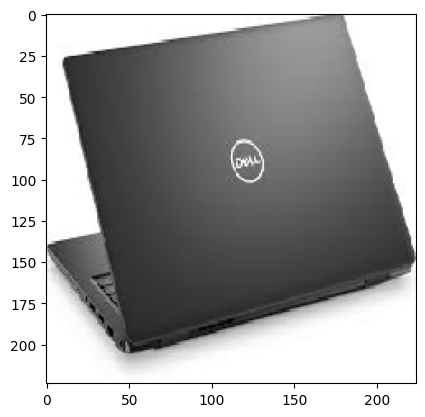

1/1 [==============================] - 1s 549ms/step
Laptop


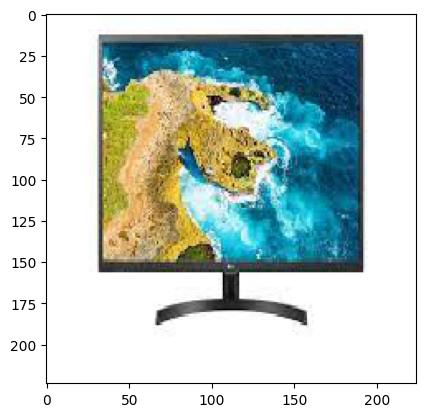

1/1 [==============================] - 1s 586ms/step
Television


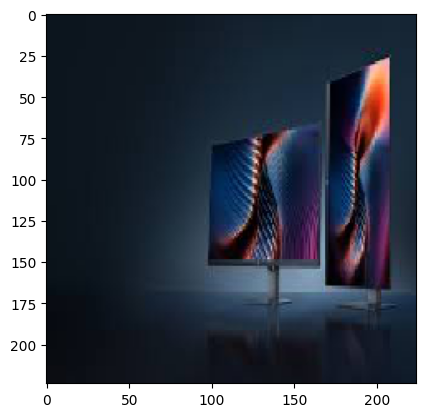

1/1 [==============================] - 1s 532ms/step
Television


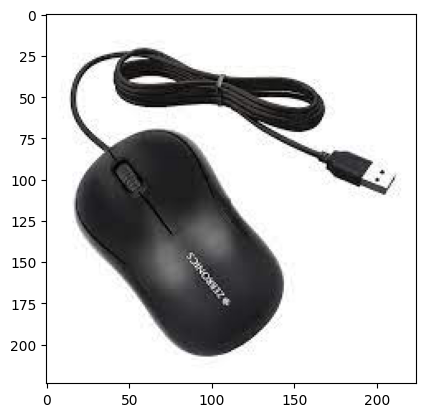

1/1 [==============================] - 0s 496ms/step
Mouse


In [70]:
path="results"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("Keyboard")
    elif pred[0][1]>0.5:
        print("Laptop")
    elif pred[0][2]>0.5:
        print("Mobile")
    elif pred[0][3]>0.5:
        print("Mouse")
    elif pred[0][4]>0.5:
        print("Television")
    else:
        print("Unknown")

In [71]:
model.save('final-model-v2.h5')